In [1]:
import numpy as np 
import pandas as pd 
from math import radians, sin, cos, sqrt, atan2

In [28]:
df = pd.read_csv("NYC.csv")

In [29]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Columnas
1. "id - un identificador único para cada viaje",
2. "vendor_id: un código que indica el proveedor asociado con el registro de viaje",
3. "pickup_datetime - fecha y hora en que se activó el medidor",
4. "dropoff_datetime - fecha y hora en que se desconectó el medidor",
5. "passenger_count - el número de pasajeros en el vehículo (valor ingresado por el conductor)",
6. "pickup_longitude - la longitud donde se activó el medidor",
7. "pickup_latitude - la latitud donde se activó el medidor",
8. "dropoff_longitude - la longitud donde se desactivó el medidor",
9. "dropoff_latitude - la latitud donde se desconectó el medidor",
10. "store_and_fwd_flag: este indicador indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor porque el vehículo no tenía una conexión con el servidor - Y=almacenar y reenviar; N=no es un viaje de almacenamiento y reenvío",
11. "trip_duration - duración del viaje en segundos"

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [32]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Limpieza de datos No necesario para La Regresión Linea
    1)- Id

In [35]:
df["id"].nunique()

1458644

In [6]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [36]:
df["vendor_id"].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

In [37]:
df.drop("id",axis=1,inplace=True)

# Nuestro análisis: - 
     1) - La identificación Id solo se usa para identificación, por lo tanto, no afectará la variable de destino que es trip_duration.
     2) - Pickup/dropoff date time debe dividirse en columnas de fecha y hora. 
     3)- No hay VALORES NULOS en el conjunto de datos.
     4) - No hay FILAS DUPLICADAS en el conjunto de datos.
     5) - Passenger_count tiene posibles valores atípicos.

# Trip Duration del viaje es nuestra variable objetivo

In [38]:
pickup_date = []
pickup_time = []
dropoff_date = []
dropoff_time = []

for i in range(0,df.shape[0]):
    a = df["pickup_datetime"][i].split(" ")
    b = df["dropoff_datetime"][i].split(" ")
    pickup_date.append(a[0])
    pickup_time.append(a[1])
    dropoff_date.append(b[0])
    dropoff_time.append(b[1])

pickup_date = pd.Series(pickup_date)
pickup_time = pd.Series(pickup_time)
dropoff_date = pd.Series(dropoff_date)
dropoff_time = pd.Series(dropoff_time)
    
modified_dataframe = pd.concat([df,pickup_date,pickup_time,dropoff_date,dropoff_time],axis=1)

In [39]:
modified_dataframe

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0,1,2,3
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13:31:04,2016-04-08,13:44:02
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,07:35:15,2016-01-10,07:46:10
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,06:57:41,2016-04-22,07:10:25
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15:56:26,2016-01-05,16:02:39


In [40]:
# Changing column names
new_column = {0:"pickup_date",1:"pickup_time",2:"dropoff_date",3:"dropoff_time"}
modified_dataframe.rename(columns=new_column,inplace=True)

In [41]:
# Dropping pickup_datetime and dropoff datetime columns
modified_dataframe.drop(["pickup_datetime","dropoff_datetime"],axis=1,inplace=True)

In [42]:
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10


In [43]:
modified_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  object 
 7   trip_duration       1458644 non-null  int64  
 8   pickup_date         1458644 non-null  object 
 9   pickup_time         1458644 non-null  object 
 10  dropoff_date        1458644 non-null  object 
 11  dropoff_time        1458644 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 133.5+ MB


In [44]:
# Changing Datatype 
modified_dataframe["pickup_date"] = pd.to_datetime(modified_dataframe["pickup_date"])
modified_dataframe["pickup_time"] = pd.to_datetime(modified_dataframe["pickup_time"])
modified_dataframe["dropoff_date"] = pd.to_datetime(modified_dataframe["dropoff_date"])
modified_dataframe["dropoff_time"] = pd.to_datetime(modified_dataframe["dropoff_time"])

C:\Users\User\AppData\Local\Temp\ipykernel_15524\1408959737.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_dataframe["pickup_time"] = pd.to_datetime(modified_dataframe["pickup_time"])
C:\Users\User\AppData\Local\Temp\ipykernel_15524\1408959737.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_dataframe["dropoff_time"] = pd.to_datetime(modified_dataframe["dropoff_time"])


In [45]:
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-05-27 17:24:55,2016-03-14,2024-05-27 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-05-27 00:43:35,2016-06-12,2024-05-27 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-05-27 11:35:24,2016-01-19,2024-05-27 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-05-27 19:32:31,2016-04-06,2024-05-27 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-05-27 13:30:55,2016-03-26,2024-05-27 13:38:10


In [46]:
#Checking if pickup date and drop off dates are different
a = 0
for i in range(0,df.shape[0]):
    if(modified_dataframe["pickup_date"][i]==modified_dataframe["dropoff_date"][i]):
        a = 1
        if(a == 0):
            x = modified_dataframe("pickup_date")[i]
            y = modified_datafrmae("dropoff_date")[i]
            print(f"Date is different. Pickup Date = {x} and Dropoff Date is {y}")
        

In [47]:
# Checking if there are more than one taxi running on a single date|
df.shape[0] - modified_dataframe.duplicated(subset="pickup_date").sum() 

182

In [48]:
modified_dataframe.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-05-27 17:24:55,2016-03-14,2024-05-27 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-05-27 00:43:35,2016-06-12,2024-05-27 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-05-27 11:35:24,2016-01-19,2024-05-27 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-05-27 19:32:31,2016-04-06,2024-05-27 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-05-27 13:30:55,2016-03-26,2024-05-27 13:38:10


In [49]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [50]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [51]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 111.3+ MB


In [28]:
#Handling Outliers 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='passenger_count'>

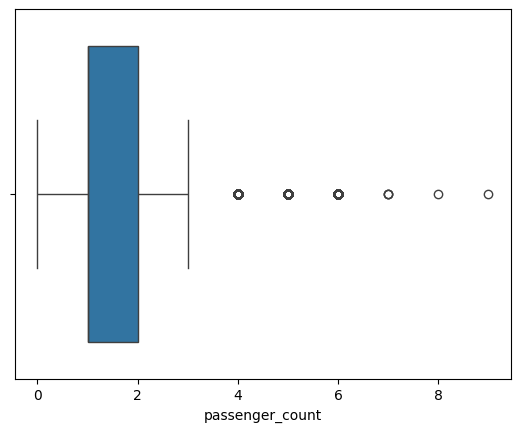

In [29]:
sns.boxplot(data=df,x="passenger_count")

In [53]:
df["passenger_count"].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [54]:
for i in range(0,df.shape[0]):
    if(df["passenger_count"][i] in [0,7,8,9]):
        df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15524\1519723704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)


In [55]:
df["passenger_count"] = df["passenger_count"].replace(df["passenger_count"][i], np.nan)

df.loc[i, "passenger_count"] = np.nan

In [56]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count       1033605
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: xlabel='passenger_count'>

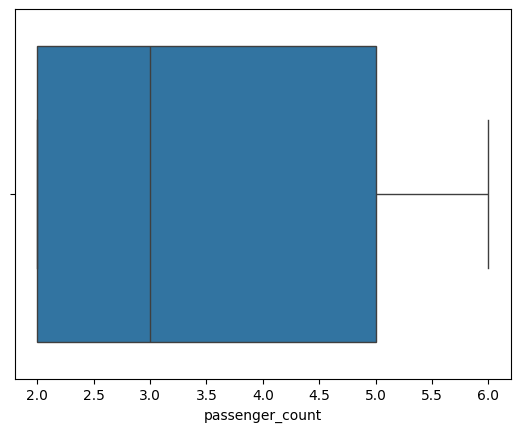

In [36]:
sns.boxplot(data=df,x="passenger_count")

In [37]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,3.280588,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,5.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,6.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06
std,0.458271,NaN,NaN,1.497074,0.114458,0.035922,0.114525,0.040351,4.853264e+03


In [38]:
df.passenger_count.value_counts()

passenger_count
2.0    210318
5.0     78088
3.0     59896
6.0     48333
4.0     28404
Name: count, dtype: int64

In [39]:
#Handling Outliters 
iqr = df["passenger_count"].quantile(0.75) - df["passenger_count"].quantile(0.25)

upper_limit = df["passenger_count"].quantile(0.75) + 1.5 * iqr
lower_limit = df["passenger_count"].quantile(0.25) - 1.5 * iqr

In [40]:
upper_limit, lower_limit

(9.5, -2.5)

In [41]:
upper_limit = 3
lower_limit = 1

In [42]:
df["passenger_count"] = np.where(df["passenger_count"]<upper_limit,df["passenger_count"],upper_limit)

In [43]:
df["passenger_count"].value_counts()

passenger_count
3.0    214721
2.0    210318
Name: count, dtype: int64

In [44]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,425039.000000,425039,425039,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,4.250390e+05
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,2.505180,-73.973332,40.750224,-73.973527,40.751370,1.030137e+03
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,-121.933342,34.359695,-121.933304,32.181141,1.000000e+00
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,-73.992073,40.736538,-73.991409,40.735201,4.120000e+02
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,-73.982040,40.753685,-73.980186,40.754391,6.830000e+02
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,3.000000,-73.967781,40.768082,-73.963226,40.769676,1.109000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,3.000000,-61.335529,41.319164,-61.335529,43.921028,2.049578e+06
std,0.458271,NaN,NaN,0.499974,0.114458,0.035922,0.114525,0.040351,4.853264e+03


<Axes: xlabel='passenger_count'>

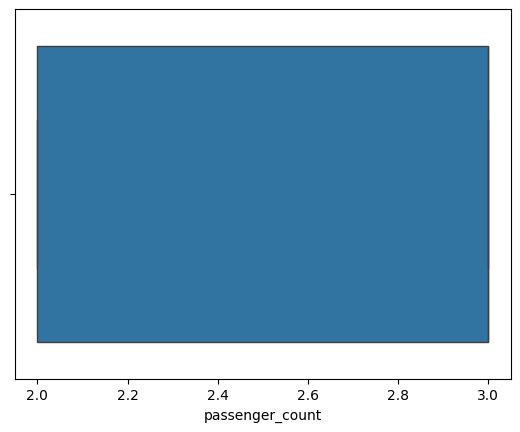

In [45]:
sns.boxplot(data=df,x="passenger_count")

# passenger_count outliers handled

In [46]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,3.0,-73.982857,40.742195,-73.992081,40.749184,N,443
6,1,2016-06-17 22:34:59,2016-06-17 22:40:40,3.0,-73.969017,40.757839,-73.957405,40.765896,N,341
11,2,2016-05-15 11:16:11,2016-05-15 11:34:59,3.0,-73.991531,40.749439,-73.956543,40.770630,N,1128
12,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2.0,-73.962982,40.756680,-73.984406,40.760719,N,1114
32,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2.0,-74.005501,40.706589,-73.985817,40.744202,N,1022


<Axes: xlabel='pickup_longitude'>

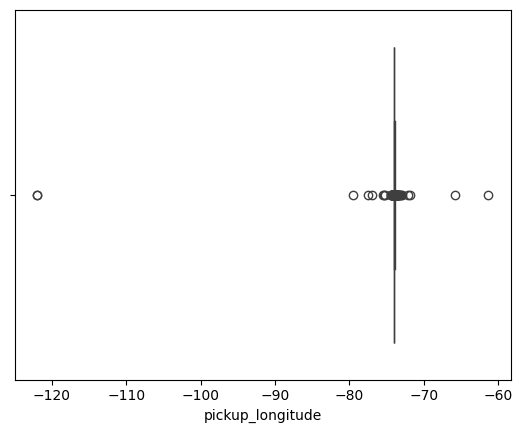

In [47]:
sns.boxplot(data=df,x="pickup_longitude")

In [57]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
   
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    radius = 6371.0
    
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    
    return distance

In [58]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count       1033605
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
dtype: int64

In [59]:
df.shape[0]

1458644

In [60]:
a = []

for i in range(df.shape[0]):
    lat1 = df["pickup_latitude"].iloc[i]
    lon1 = df["pickup_longitude"].iloc[i]
    lat2 = df["dropoff_latitude"].iloc[i]
    lon2 = df["dropoff_longitude"].iloc[i]
    
    if pd.notnull(lat1) and pd.notnull(lon1) and pd.notnull(lat2) and pd.notnull(lon2):
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        a.append(distance)
    else:
        a.append(np.nan)


In [61]:
distance = pd.Series(a)

In [62]:
distance.shape

(1458644,)

In [63]:
df.shape

(1458644, 10)

In [64]:
df_reset = df.reset_index(drop=True)
distance_reset = distance.reset_index(drop=True)

concatenated_df = pd.concat([df_reset, distance_reset], axis=1)


In [65]:
concatenated_df.shape

(1458644, 11)

In [66]:
concatenated_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,NaN,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,NaN,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,NaN,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,NaN,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,NaN,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [67]:
new_name = {0:"distance"}
concatenated_df.rename(columns=new_name,inplace=True)

In [68]:
df_new = concatenated_df
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,NaN,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,NaN,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,NaN,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,NaN,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,NaN,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [69]:
df_new.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [70]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,NaN,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,NaN,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,NaN,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,NaN,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,NaN,N,435,1.188588


# Univariate Analysis

## Vendor_id 

<Axes: xlabel='vendor_id'>

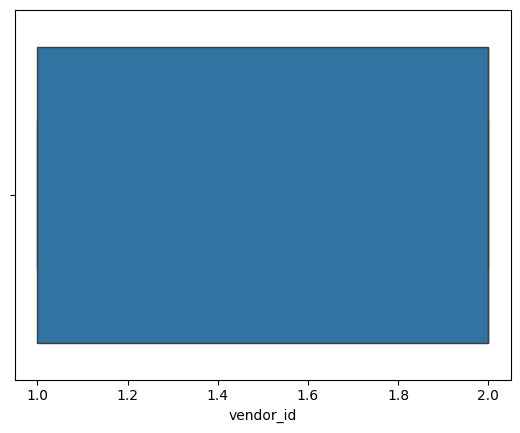

In [62]:
#Box-plot
sns.boxplot(df_new,x="vendor_id")

<Axes: xlabel='vendor_id', ylabel='Count'>

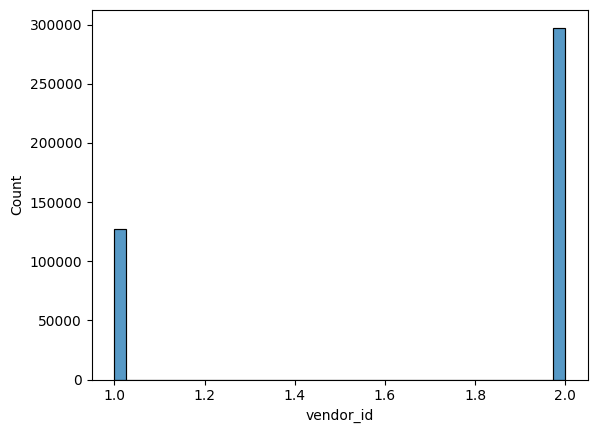

In [63]:
#Histogram
sns.histplot(df_new,x="vendor_id")

## passenger_count

<Axes: xlabel='passenger_count', ylabel='Count'>

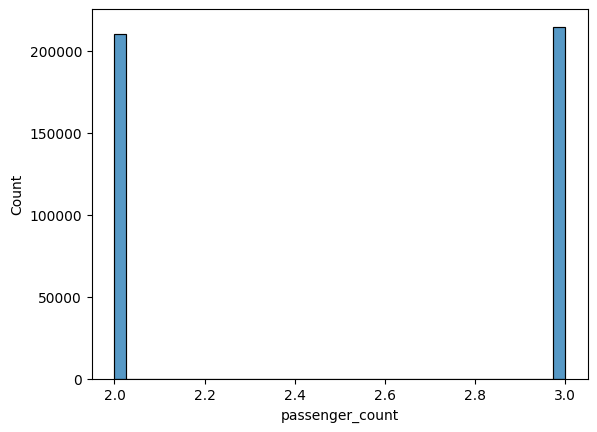

In [64]:
sns.histplot(df_new,x="passenger_count")

## Distance

<Axes: xlabel='distance'>

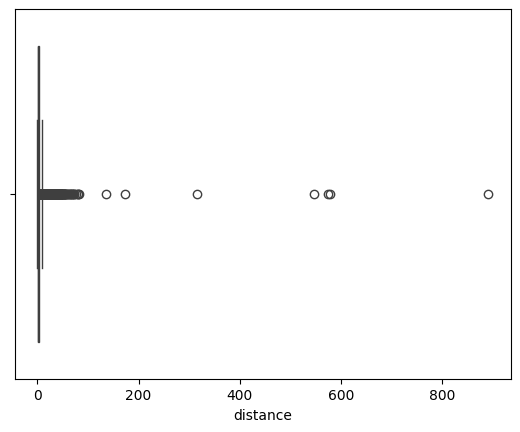

In [65]:
sns.boxplot(df_new,x="distance")

In [71]:
df_new["distance"].value_counts()

distance
0.000000    5897
0.000424     101
0.000424      52
0.000424      48
0.000848      37
            ... 
2.988816       1
3.134765       1
3.231340       1
1.584859       1
1.134042       1
Name: count, Length: 1452288, dtype: int64

In [72]:
df_new.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,distance
count,1.458644e+06,1458644,1458644,425039.000000,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,3.280588,9.594923e+02,3.440864e+00
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,2.000000,1.000000e+00,0.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,2.000000,3.970000e+02,1.231837e+00
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,3.000000,6.620000e+02,2.093717e+00
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,5.000000,1.075000e+03,3.875337e+00
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,6.000000,3.526282e+06,1.240909e+03
std,4.987772e-01,NaN,NaN,1.497074,5.237432e+03,4.296538e+00


In [68]:
#Handling Outliters for distance
iqr = df_new["distance"].quantile(0.75) - df_new["distance"].quantile(0.25)

upper_limit = df_new["distance"].quantile(0.75) + 1.5 * iqr
lower_limit = df_new["distance"].quantile(0.25) - 1.5 * iqr

In [69]:
upper_limit,lower_limit

(8.161065147538924, -2.8806428431325295)

In [70]:
lower_limit = 0 #Distance cannot be negative

In [71]:
df_new["distance"] = np.where(df_new["distance"]<upper_limit,df_new["distance"],upper_limit)

In [72]:
df_new.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,distance
count,425039.000000,425039,425039,425039.000000,4.250390e+05,425039.000000
mean,1.699971,2016-04-01 15:17:14.185813504,2016-04-01 15:34:24.322946816,2.505180,1.030137e+03,3.002227
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:07:49,2.000000,1.000000e+00,0.000000
25%,1.000000,2016-02-17 21:32:40.500000,2016-02-17 21:44:45.500000,2.000000,4.120000e+02,1.259998
50%,2.000000,2016-04-02 01:08:45,2016-04-02 01:23:43,3.000000,6.830000e+02,2.143761
75%,2.000000,2016-05-15 12:15:40.500000,2016-05-15 12:32:23,3.000000,1.109000e+03,4.020425
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,3.000000,2.049578e+06,8.161065
std,0.458271,NaN,NaN,0.499974,4.853264e+03,2.348940


<Axes: xlabel='distance'>

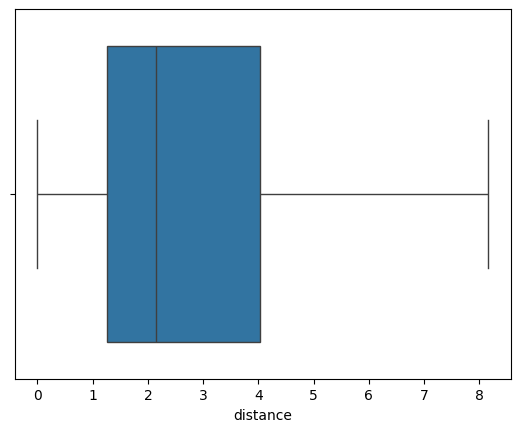

In [73]:
sns.boxplot(df_new,x="distance")

## pickup_datetime

In [74]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,NaN,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,NaN,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,NaN,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,NaN,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,NaN,N,435,1.188588


In [75]:
df_new.drop("dropoff_datetime",axis=1,inplace=True)

In [76]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,NaN,N,455,1.498521
1,1,2016-06-12 00:43:35,NaN,N,663,1.805507
2,2,2016-01-19 11:35:24,NaN,N,2124,6.385098
3,2,2016-04-06 19:32:31,NaN,N,429,1.485498
4,2,2016-03-26 13:30:55,NaN,N,435,1.188588


In [77]:
year = df_new["pickup_datetime"].dt.year
month = df_new["pickup_datetime"].dt.month
days = df_new["pickup_datetime"].dt.day
hours = df_new["pickup_datetime"].dt.hour
minutes = df_new["pickup_datetime"].dt.minute
seconds = df_new["pickup_datetime"].dt.second

In [78]:
year.shape,month.shape,days.shape,hours.shape,minutes.shape,seconds.shape

((425039,), (425039,), (425039,), (425039,), (425039,), (425039,))

In [79]:
df_new = df_new.reset_index()

In [80]:
df_new["year"] = df_new["pickup_datetime"].dt.year

In [81]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
dtype: int64

In [82]:
df_new["month"] = df_new["pickup_datetime"].dt.month
df_new["days"] = df_new["pickup_datetime"].dt.day
df_new["hour"] = df_new["pickup_datetime"].dt.hour
df_new["minute"] = df_new["pickup_datetime"].dt.minute
df_new["second"] = df_new["pickup_datetime"].dt.second

In [83]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [84]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,year,month,days,hour,minute,second
0,0,2,2016-01-30 22:01:40,3.0,N,443,1.098942,2016,1,30,22,1,40
1,1,1,2016-06-17 22:34:59,3.0,N,341,1.326279,2016,6,17,22,34,59
2,2,2,2016-05-15 11:16:11,3.0,N,1128,3.773096,2016,5,15,11,16,11
3,3,2,2016-02-19 09:52:46,2.0,N,1114,1.859483,2016,2,19,9,52,46
4,4,2,2016-05-10 19:27:38,2.0,N,1022,4.499284,2016,5,10,19,27,38


In [85]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [86]:
df_new.year.value_counts()

year
2016    425039
Name: count, dtype: int64

In [87]:
df_new.drop("year",axis=1,inplace=True)

In [88]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,0,2,2016-01-30 22:01:40,3.0,N,443,1.098942,1,30,22,1,40
1,1,1,2016-06-17 22:34:59,3.0,N,341,1.326279,6,17,22,34,59
2,2,2,2016-05-15 11:16:11,3.0,N,1128,3.773096,5,15,11,16,11
3,3,2,2016-02-19 09:52:46,2.0,N,1114,1.859483,2,19,9,52,46
4,4,2,2016-05-10 19:27:38,2.0,N,1022,4.499284,5,10,19,27,38


In [89]:
df_new.drop("index",axis=1,inplace=True)

In [90]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-01-30 22:01:40,3.0,N,443,1.098942,1,30,22,1,40
1,1,2016-06-17 22:34:59,3.0,N,341,1.326279,6,17,22,34,59
2,2,2016-05-15 11:16:11,3.0,N,1128,3.773096,5,15,11,16,11
3,2,2016-02-19 09:52:46,2.0,N,1114,1.859483,2,19,9,52,46
4,2,2016-05-10 19:27:38,2.0,N,1022,4.499284,5,10,19,27,38


In [91]:
df_new.month.value_counts()

month
3    74116
4    73789
5    73021
2    68658
6    68359
1    67096
Name: count, dtype: int64

In [92]:
df_new.describe()

,vendor_id,pickup_datetime,passenger_count,trip_duration,distance,month,days,hour,minute,second
count,425039.000000,425039,425039.000000,4.250390e+05,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000,425039.000000
mean,1.699971,2016-04-01 15:17:14.185813504,2.505180,1.030137e+03,3.002227,3.522441,15.537073,13.851790,29.601488,29.476081
min,1.000000,2016-01-01 00:00:17,2.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2016-02-17 21:32:40.500000,2.000000,4.120000e+02,1.259998,2.000000,8.000000,9.000000,15.000000,14.000000
50%,2.000000,2016-04-02 01:08:45,3.000000,6.830000e+02,2.143761,4.000000,15.000000,15.000000,30.000000,29.000000
75%,2.000000,2016-05-15 12:15:40.500000,3.000000,1.109000e+03,4.020425,5.000000,23.000000,19.000000,45.000000,45.000000
max,2.000000,2016-06-30 23:59:37,3.000000,2.049578e+06,8.161065,6.000000,31.000000,23.000000,59.000000,59.000000
std,0.458271,NaN,0.499974,4.853264e+03,2.348940,1.681754,8.720756,6.502928,17.339822,17.326803


<Axes: ylabel='month'>

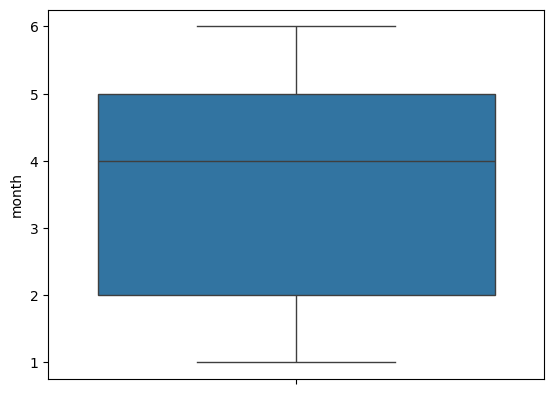

In [93]:
sns.boxplot(df_new["month"])

<Axes: ylabel='days'>

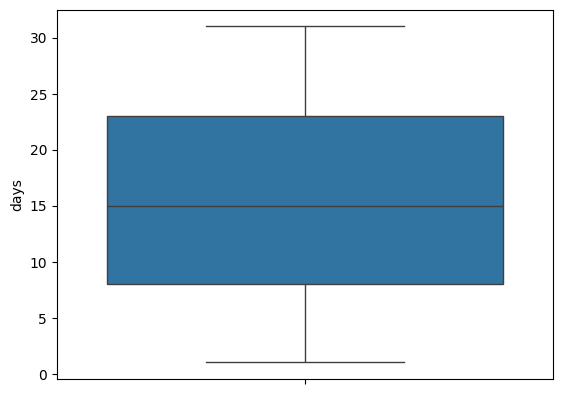

In [94]:
sns.boxplot(df_new["days"])

<Axes: ylabel='hour'>

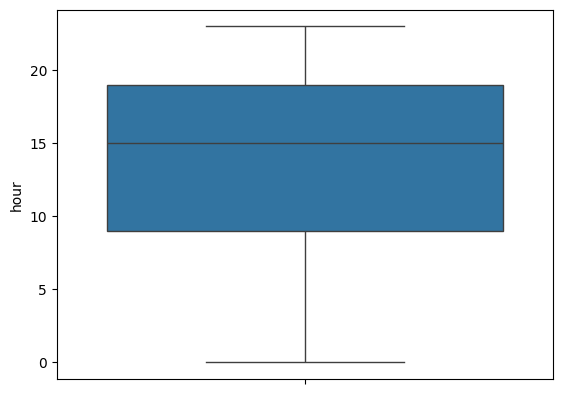

In [95]:
sns.boxplot(df_new["hour"])

<Axes: ylabel='second'>

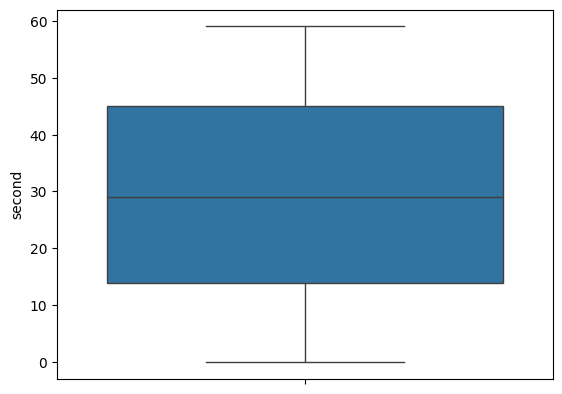

In [96]:
sns.boxplot(df_new["second"])

<Axes: ylabel='minute'>

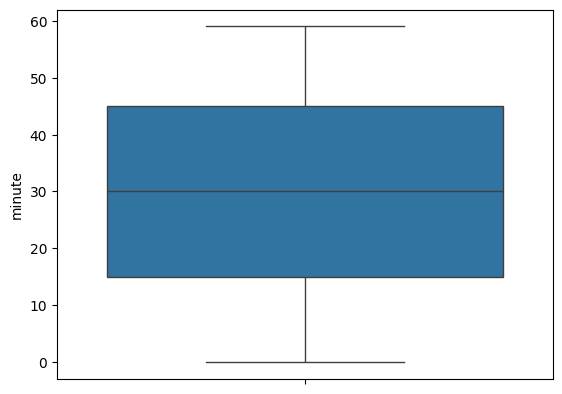

In [97]:
sns.boxplot(df_new["minute"])

In [98]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-01-30 22:01:40,3.0,N,443,1.098942,1,30,22,1,40
1,1,2016-06-17 22:34:59,3.0,N,341,1.326279,6,17,22,34,59
2,2,2016-05-15 11:16:11,3.0,N,1128,3.773096,5,15,11,16,11
3,2,2016-02-19 09:52:46,2.0,N,1114,1.859483,2,19,9,52,46
4,2,2016-05-10 19:27:38,2.0,N,1022,4.499284,5,10,19,27,38


In [99]:
df_new.drop("pickup_datetime",axis=1,inplace=True)

In [100]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,3.0,N,443,1.098942,1,30,22,1,40
1,1,3.0,N,341,1.326279,6,17,22,34,59
2,2,3.0,N,1128,3.773096,5,15,11,16,11
3,2,2.0,N,1114,1.859483,2,19,9,52,46
4,2,2.0,N,1022,4.499284,5,10,19,27,38


In [101]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
ohe = OneHotEncoder(drop="first")

In [106]:
store_and_fwd_flag_encoded = ohe.fit_transform(df_new[["store_and_fwd_flag"]])

In [107]:
ohe.categories_

[array(['N', 'Y'], dtype=object)]

In [112]:
df_new["Y"] = store_and_fwd_flag_encoded

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [77]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,NaN,N,455,1.498521
1,1,2016-06-12 00:43:35,NaN,N,663,1.805507
2,2,2016-01-19 11:35:24,NaN,N,2124,6.385098
3,2,2016-04-06 19:32:31,NaN,N,429,1.485498
4,2,2016-03-26 13:30:55,NaN,N,435,1.188588


In [114]:
df_new.rename({"Y":"Yes_store_and_fwd_flag"},axis=1,inplace=True)

In [78]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,NaN,N,455,1.498521
1,1,2016-06-12 00:43:35,NaN,N,663,1.805507
2,2,2016-01-19 11:35:24,NaN,N,2124,6.385098
3,2,2016-04-06 19:32:31,NaN,N,429,1.485498
4,2,2016-03-26 13:30:55,NaN,N,435,1.188588


In [79]:
df_new.drop("store_and_fwd_flag",axis=1,inplace=True)

In [80]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,trip_duration,distance
0,2,2016-03-14 17:24:55,NaN,455,1.498521
1,1,2016-06-12 00:43:35,NaN,663,1.805507
2,2,2016-01-19 11:35:24,NaN,2124,6.385098
3,2,2016-04-06 19:32:31,NaN,429,1.485498
4,2,2016-03-26 13:30:55,NaN,435,1.188588


In [118]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second
vendor_id,1.000000,0.298200,0.011095,-0.041926,-0.016647,-0.002971,-0.036457,0.002827,0.000538
passenger_count,0.298200,1.000000,0.005033,-0.015448,-0.006207,0.003568,-0.022525,0.000072,0.002222
trip_duration,0.011095,0.005033,1.000000,0.109903,0.010865,0.000911,0.002470,-0.002698,-0.001935
distance,-0.041926,-0.015448,0.109903,1.000000,0.021658,0.007044,-0.037191,-0.008475,0.001208
month,-0.016647,-0.006207,0.010865,0.021658,1.000000,-0.012081,-0.003356,0.000510,-0.001288
days,-0.002971,0.003568,0.000911,0.007044,-0.012081,1.000000,0.003371,-0.002636,0.001242
hour,-0.036457,-0.022525,0.002470,-0.037191,-0.003356,0.003371,1.000000,0.000518,0.003037
minute,0.002827,0.000072,-0.002698,-0.008475,0.000510,-0.002636,0.000518,1.000000,-0.003744
second,0.000538,0.002222,-0.001935,0.001208,-0.001288,0.001242,0.003037,-0.003744,1.000000


In [119]:
df_new['final_seconds'] = df_new['hour'] * 3600 + df_new['minute'] * 60 + df_new['second']


In [120]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,final_seconds
0,2,3.0,443,1.098942,1,30,22,1,40,79300
1,1,3.0,341,1.326279,6,17,22,34,59,81299
2,2,3.0,1128,3.773096,5,15,11,16,11,40571
3,2,2.0,1114,1.859483,2,19,9,52,46,35566
4,2,2.0,1022,4.499284,5,10,19,27,38,70058


In [121]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,final_seconds
vendor_id,1.000000,0.298200,0.011095,-0.041926,-0.016647,-0.002971,-0.036457,0.002827,0.000538,-0.036294
passenger_count,0.298200,1.000000,0.005033,-0.015448,-0.006207,0.003568,-0.022525,0.000072,0.002222,-0.022497
trip_duration,0.011095,0.005033,1.000000,0.109903,0.010865,0.000911,0.002470,-0.002698,-0.001935,0.002346
distance,-0.041926,-0.015448,0.109903,1.000000,0.021658,0.007044,-0.037191,-0.008475,0.001208,-0.037528
month,-0.016647,-0.006207,0.010865,0.021658,1.000000,-0.012081,-0.003356,0.000510,-0.001288,-0.003331
days,-0.002971,0.003568,0.000911,0.007044,-0.012081,1.000000,0.003371,-0.002636,0.001242,0.003251
hour,-0.036457,-0.022525,0.002470,-0.037191,-0.003356,0.003371,1.000000,0.000518,0.003037,0.999014
minute,0.002827,0.000072,-0.002698,-0.008475,0.000510,-0.002636,0.000518,1.000000,-0.003744,0.044911
second,0.000538,0.002222,-0.001935,0.001208,-0.001288,0.001242,0.003037,-0.003744,1.000000,0.003607
final_seconds,-0.036294,-0.022497,0.002346,-0.037528,-0.003331,0.003251,0.999014,0.044911,0.003607,1.000000


In [122]:
df_new.drop(["hour","second","minute"],axis=1,inplace=True)

In [123]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,final_seconds
0,2,3.0,443,1.098942,1,30,79300
1,1,3.0,341,1.326279,6,17,81299
2,2,3.0,1128,3.773096,5,15,40571
3,2,2.0,1114,1.859483,2,19,35566
4,2,2.0,1022,4.499284,5,10,70058


# Experimenting

In [124]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

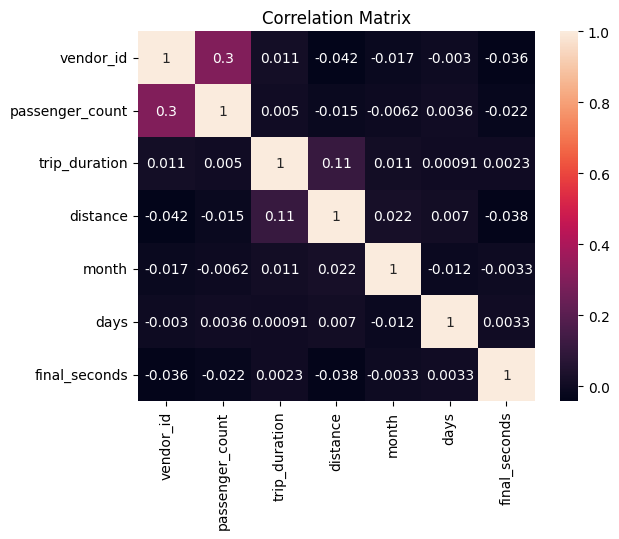

In [125]:
sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation Matrix')

In [82]:
# Calculating speed
speed = []
for i in range(df.shape[0]):
    if df_new['trip_duration'][i] != 0:
        speed_value = df_new["distance"][i] / (df_new['trip_duration'][i]/ 3600)
    else:
        speed_value = np.nan  # Assign NaN when denominator is zero
    
    speed.append(speed_value)



In [83]:
df_new["speed"] = speed 

In [84]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,trip_duration,distance,speed
0,2,2016-03-14 17:24:55,NaN,455,1.498521,11.856428
1,1,2016-06-12 00:43:35,NaN,663,1.805507,9.803659
2,2,2016-01-19 11:35:24,NaN,2124,6.385098,10.822201
3,2,2016-04-06 19:32:31,NaN,429,1.485498,12.465721
4,2,2016-03-26 13:30:55,NaN,435,1.188588,9.836594


In [85]:
df_new.isnull().sum()

vendor_id                0
pickup_datetime          0
passenger_count    1033605
trip_duration            0
distance                 0
speed                    0
dtype: int64

In [86]:
asd = df_new.drop(['vendor_id','passenger_count','pickup_datetime'], axis=1)
asd.to_csv('NYC_SPEED.csv', index=False)

In [87]:
total_rows = len(asd)
part_size = total_rows // 3

part1 = asd.iloc[:part_size]
part2 = asd.iloc[part_size:part_size*2]
part3 = asd.iloc[part_size*2:]

part1.to_csv('NYC_SPEED_1.csv', index=False)
part2.to_csv('NYC_SPEED_2.csv', index=False)
part3.to_csv('NYC_SPEED_3.csv', index=False)